#Red neuronal convolucional CNN

##P1. Importando librerias

In [12]:
import os
import tensorflow as tf

from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

##P2. Descargar y prepar el conjunto de datos CIFAR10
El conjunto de datos CIFAR10 contiene 60.000 imágenes en color en 10 clases, con 6.000 imágenes en cada clase. El conjunto de datos se divide en 50.000 imágenes de entrenamiento y 10.000 imágenes de prueba. Las clases son mutuamente excluyentes y no hay superposición entre ellas.

In [2]:
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

170500096/170498071 [==============================] - 2s 0us/step


###P2.1 Normalizamos los pixeles 0 a 1

In [3]:
# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0

###P2.2 verificamos los datos

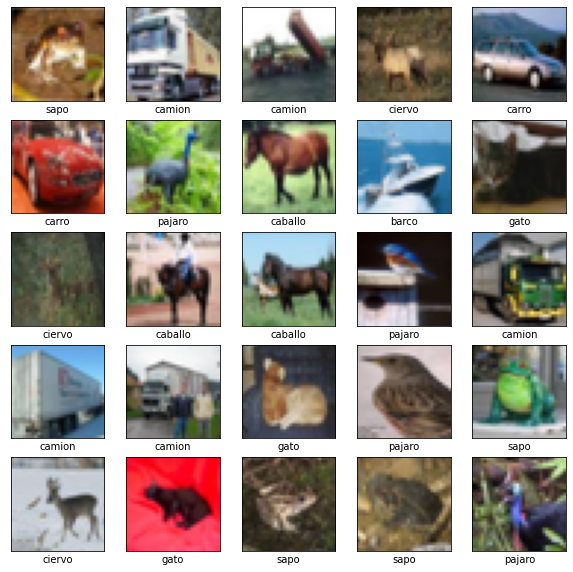

In [4]:
class_names = ['airplane', 'automovile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

class_names = ['avion', 'carro', 'pajaro', 'gato', 'ciervo',
               'perro', 'sapo', 'caballo', 'barco', 'camion']
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    #Las etiquetas CIFAR resultan ser matrices, por lo que necesita el índice adicional
    plt.xlabel(class_names[train_labels[i][0]])
plt.show()

##P3. creamos la CNN
Como entrada, una CNN toma tensores de forma (image_height, image_width, color_channels), ignorando el tamaño del lote. Si es nuevo en estas dimensiones, color_channels se refiere a (R, G, B). En este ejemplo, configurará nuestra CNN para procesar entradas de forma (32, 32, 3), que es el formato de las imágenes CIFAR. Puede hacer esto pasando el argumento input_shape a nuestra primera capa.


---

la salida de cada capa Conv2D y MaxPooling2D es un tensor de forma 3D (alto, ancho, canales). Las dimensiones de ancho y alto tienden a reducirse a medida que avanza en la red. El número de canales de salida para cada capa Conv2D se controla mediante el primer argumento (por ejemplo, 32 o 64). Normalmente, a medida que el ancho y la altura se reducen, puede permitirse (computacionalmente) agregar más canales de salida en cada capa Conv2D.

In [5]:
cnn = models.Sequential()
cnn.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
cnn.add(layers.MaxPooling2D((2, 2)))
cnn.add(layers.Conv2D(64, (3, 3), activation='relu'))
cnn.add(layers.MaxPooling2D((2, 2)))
cnn.add(layers.Conv2D(64, (3, 3), activation='relu'))
#creamos otra capa de 64 
cnn.add(layers.Flatten())
cnn.add(layers.Dense(64, activation='relu'))
cnn.add(layers.Dense(10))
#quedando 32 -> 4 ->4 -> 64 -> 10 (activación por softmax)
# las capas ocultas (4, 4, 64) se aplanan en vectores de forma (1024) antes de pasar por dos capas densas.

Vamos a mostrar la arquitectura de nuestro modelo hasta ahora

In [6]:
cnn.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 4, 4, 64)          36928     
_________________________________________________________________
flatten (Flatten)            (None, 1024)              0         
_________________________________________________________________
dense (Dense)                (None, 64)                6

##P4. Compilar y entrenar el modelo

In [7]:
cnn.compile(optimizer='adam',loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),metrics=['accuracy'])
#paciencia se demora varios minutos (al menos 5)
history = cnn.fit(train_images, train_labels, epochs=10, validation_data=(test_images, test_labels))

Epoch 1/10
1563/1563 [==============================] - 64s 41ms/step - loss: 1.5022 - accuracy: 0.4528 - val_loss: 1.2031 - val_accuracy: 0.5714
Epoch 2/10
1563/1563 [==============================] - 63s 40ms/step - loss: 1.1432 - accuracy: 0.5967 - val_loss: 1.0337 - val_accuracy: 0.6370
Epoch 3/10
1563/1563 [==============================] - 64s 41ms/step - loss: 0.9932 - accuracy: 0.6518 - val_loss: 0.9322 - val_accuracy: 0.6707
Epoch 4/10
1563/1563 [==============================] - 64s 41ms/step - loss: 0.8943 - accuracy: 0.6862 - val_loss: 0.9929 - val_accuracy: 0.6566
Epoch 5/10
1563/1563 [==============================] - 65s 41ms/step - loss: 0.8182 - accuracy: 0.7139 - val_loss: 0.9212 - val_accuracy: 0.6813
Epoch 6/10
1563/1563 [==============================] - 65s 41ms/step - loss: 0.7667 - accuracy: 0.7335 - val_loss: 0.8474 - val_accuracy: 0.7102
Epoch 7/10
1563/1563 [==============================] - 65s 41ms/step - loss: 0.7123 - accuracy: 0.7522 - val_loss: 0.8534 -

##P5.Evaluar el modelo

313/313 - 3s - loss: 0.8853 - accuracy: 0.7110


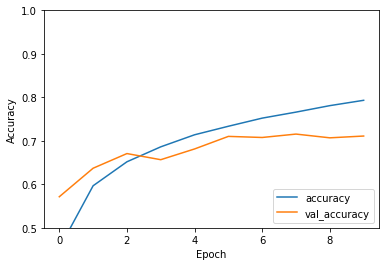

In [8]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = cnn.evaluate(test_images,  test_labels, verbose=2)

###P5.1 Cuanta precisión?

In [9]:
print("precisión de: {}%".format(test_acc))

precisión de: 0.7110000252723694%


##P6. exportamos el modelo

In [13]:
target_dir = './modelo/'
if not os.path.exists(target_dir):
  os.mkdir(target_dir)
cnn.save('./modelo/modeloCIFAR10.h5')
cnn.save_weights('./modelo/pesosCIFAR10.h5')

##P7. probamos el modelo (exportado)

In [14]:
import numpy as np
from tensorflow.python.keras.preprocessing.image import load_img, img_to_array
from tensorflow.python.keras.models import load_model
import h5py

# definimos los parametros
longitud, altura = 150, 150
longitud, altura = 32, 32
modelo = './modelo/modeloCIFAR10.h5'
pesos_modelo = './modelo/pesosCIFAR10.h5'
cnn = load_model(modelo)              #cargamos el modelo
cnn.load_weights(pesos_modelo)        #cargamos los pesos asociados al modelo  

#creamos una funcion que le ingrese un archivo y me retorne la clasificacion
               
def predict(file):
  class_names = ['avion', 'carro', 'pajaro', 'gato', 'ciervo',
               'perro', 'sapo', 'caballo', 'barco', 'camion']
  x = load_img(file, target_size=(longitud, altura))    #cargamos la imagen y definimos una imagen de 150 x 150
  x = img_to_array(x)                                   #convertimos la imagen en un array
  x = np.expand_dims(x, axis=0)                         #Le agregamos una dimension adicional al array para facilitar las busquedas.
  array = cnn.predict(x)                                #la CNN realiza la predicción basado en el modelo
  result = array[0]                                     #retorna tres un vector de 2  dimensiones [[0,0,1]] (tomaremos el 1) 
  answer = np.argmax(result)                            #trae el indice del resultado mas alto(el mejor)
  print(class_names[answer])  
  #return answer


In [17]:
predict("/content/Imagen_prueba8.jpg")

caballo


#Creando un clasificador de GATOS, PERROS y GORILAS
---




1.   Cargar la data como zip a la maquina virtual de google colaboratory
2.   Descomprimir la data 
3.   Importar las librerias necesarias:


*    Tensorflow: Es un framework orientado a redes nueronales (texto e imagenes)
*   Keras:  es un framework de alto nivel para el aprendizaje utilizado para procesamiento de imagenes
*   -->ImageDataGenerator: preprocesar las imagenes para entrenas las imagenes.
*   -->optimizers: Algoritmos para entrenas la red neuronal
*   -->Sequential: biblioteca con algoritmos para hacer redes neuronales secuenciales (capas ordenadas)
*   -->Convolution2D y MaxPouling2D: son las librerias que permiten hacer las convoluciones y filtros en las imagenes.
*   -->Backend: permite iniciar una session de keras  limpia.







##P0. instalando librerias

In [18]:
# instalar librería para visualizar el progreso de ejecución una tarea en background
!pip install pyprind

##P1. cargando librerias necesarias

In [21]:
import requests
import os            #  trabajar sobre el sistema operativo
import sys           #  manipular archivos (cortar, copiar, borrar, crear)
import tarfile       #  Manipular archivos comprimidos (comprimir, descomprimir)
import time          #  calcular tiempo (en este caso tiempo de descarga de archivo)
import pyprind

from tensorflow.python.keras.preprocessing.image import ImageDataGenerator
from tensorflow.python.keras import optimizers
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dropout, Flatten, Dense, Activation
from tensorflow.python.keras.layers import  Convolution2D, MaxPooling2D
from tensorflow.python.keras import backend as K

##P2. obteniendo el dataset

###P2.1 función para ver avance de proceso en background

In [22]:
def reporthook(count, block_size, total_size):
    global start_time
    if count == 0:
        start_time = time.time()
        return
    duration = time.time() - start_time
    progress_size = int(count * block_size)
    speed = progress_size / (1024.**2 * duration)
    percent = count * block_size * 100. / total_size
    sys.stdout.write("\r%d%% | %d MB | %.2f MB/s | %d segundos transcurrido" %
                    (percent, progress_size / (1024.**2), speed, duration))
    sys.stdout.flush()


###P2.2 Descargando .zip de github

In [23]:
source = 'https://github.com/luisFernandoCastellanosG/Machine_learning/blob/master/Computer_vision/CNN_Gato_Perro_Gorila/dataset.zip'
target = 'dataset.zip'

if not os.path.isfile('dataset.zip'):
    
    if (sys.version_info < (3, 0)):
        import urllib
        urllib.urlretrieve(source, target, reporthook)
    
    else:
        import urllib.request
        urllib.request.urlretrieve(source, target, reporthook)

-9830400% | 0 MB | 1.58 MB/s | 0 segundos transcurrido

###P2.3 Extraemos los archivos

In [24]:
from zipfile import ZipFile 
with ZipFile ("/content/dataset.zip", "r") as zip:
  zip.extractall()
  print("termino extrancion de la data")

termino extrancion de la data


##P3. Limpiamos la sessión de keras 
para no tener problemas con variables y asignamos las ubicaciones fisicas de los archivos de la data (entrenamiento como de validación)

In [25]:
K.clear_session()
data_entrenamiento = '/content/dataset/entrenamiento'
data_validacion = '/content/dataset/validacion'

###P3.1 Definimos parametros de la RNA
Son parametros que necesitaremos en las rede neuronal.

In [26]:
"""
Parameters
"""
epocas=20                     #cuantas veces interactuaremos con las red
longitud, altura = 150, 150   #tamaño al que vamos a procesar las imagenes
batch_size = 32               #Cantidad de imagenes que se le enviaran a la red para procesar por Iteración
pasos = 1000                  #Número de veces que se va a procesar la información en cada EPOCA( cada iteracción tendra 100 pasos)
validation_steps = 300        #Para cada EPOCA se ejecutaran 300 pasos con el set de datos de validación (para verificar que tanto aprende el algoritmo )
filtrosConv1 = 32             #profundidad de 32 para la 1° convolución
filtrosConv2 = 64             #profundidad de 64 para la 2° convolución
tamano_filtro1 = (3, 3)       #tamaño de 3 y altura de 3 para el filtro en 1°convolución
tamano_filtro2 = (2, 2)       #tamaño de 2 y altura de 2 para el filtro en 1°convolución
tamano_pool = (2, 2)          #tamaño del filtro que se usara en el MAXPOULING
clases = 3                    #Número de carpetas (gatos, perros, gorilas)
lr = 0.0004                   #que tan grande seran los ajustes automaticos que podra hacer la CNN para acercarse a lo requerido

##P4. Preparamos las imagenes de train y test

*   **rotation_range***: es un valor en grados (0-180), un rango dentro del cual rotar imágenes al azar
*   **width_shifty/height_shiftson**: rangos (como una fracción del ancho o alto total) dentro de los cuales traducir imágenes de forma aleatoria vertical u horizontalmente
*   **rescale**: los pixeles de 0 a 255 a valores entres 0 y 1 (mejora el entrenamiento)
*   **shear_range**: genera las imagenes con inclinaciones (para que el algoritmo aprenda que las imagenes no siempre apareceran rectas)
*   **zoom_range**: genera las imagenes con un zoom para que el algoritmo aprenda que un (perro, gato o gorila) no siempre apareceran completos (pueden aparecer partes de el)
*    **horizontal_flip**: tomara las imagenes y las invierte en horizontal y asi la CNN aprendera direccionalidad en las imagenes.
*    **fill_mode**: es la estrategia utilizada para rellenar los píxeles recién creados, que pueden aparecer después de una rotación o un cambio de ancho / alto.





In [27]:
entrenamiento_datagen = ImageDataGenerator(
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    rescale=1. / 255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')

test_datagen= ImageDataGenerator(rescale=1. / 255)

###P4.1 Pero que carajos estamos haciendo???

Creamos un directorio para hacer pruebas (temporal)

In [28]:
if not os.path.isdir('/content/preview'):
  os.mkdir('/content/preview')

In [29]:
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img

datagen = ImageDataGenerator(
        rotation_range=40,
        width_shift_range=0.2,
        height_shift_range=0.2,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        fill_mode='nearest')

img = load_img('/content/dataset/entrenamiento/gorila/104.jpg')  # this is a PIL image
x = img_to_array(img)  # this is a Numpy array with shape (3, 150, 150)
x = x.reshape((1,) + x.shape)  # this is a Numpy array with shape (1, 3, 150, 150)

# the .flow() command below generates batches of randomly transformed images
# and saves the results to the `preview/` directory
i = 0
for batch in datagen.flow(x, batch_size=1,save_to_dir='preview', save_prefix='gorila', save_format='jpeg'):
    i += 1
    if i > 20:
        break  # otherwise the generator would loop indefinitely

mostrar imagenes que se crearon

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from IPython import display

pathpreview='/content/preview'
files = os.listdir(pathpreview)
fnames = [os.path.join(pathpreview,fname)for fname in files[:]]
fig = plt.gcf()
fig.set_size_inches(50,50)
for i,fname in enumerate(fnames):
  sp = plt.subplot(7,3,i+1)
  sp.axis('off')
  img = mpimg.imread(fname)
  plt.imshow(img)


###P4.2 Preparamos los lotes de imagenes

In [31]:
#Array de entrenamiento
entrenamiento_generador = entrenamiento_datagen.flow_from_directory(
    data_entrenamiento, 
    target_size=(altura, longitud),
    batch_size=batch_size,
    class_mode='categorical')

#Array de validación
validacion_generador = test_datagen.flow_from_directory(
    data_validacion,
    target_size=(altura, longitud),
    batch_size=batch_size,
    class_mode='categorical')

Found 1093 images belonging to 3 classes.
Found 2073 images belonging to 3 classes.


##p5.**Creamos** la red neuronal convolucional (CNN - Convolution Neural Network)

In [32]:
cnn = Sequential()

#creamos la primera capa 
cnn.add(Convolution2D(filtrosConv1, tamano_filtro1, padding ="same", input_shape=(longitud, altura, 3), activation='relu'))
cnn.add(MaxPooling2D(pool_size=tamano_pool))

#creamos la segunda capa connvolucional
cnn.add(Convolution2D(filtrosConv2, tamano_filtro2, padding ="same"))
cnn.add(MaxPooling2D(pool_size=tamano_pool))

#una vez creada ahora empezaremos la clasificación
cnn.add(Flatten())                                   #primera capa: convertiremos la imagen multidimensional en una sola dimensión con todos los datos      
cnn.add(Dense(256, activation='relu'))               #Segunda capa: asignamos 256 neuronas (se hace adrede..por experiencia)
cnn.add(Dropout(0.5))                                #a la capa densa durante el entrenamiento apagaremos de forma aleatoria el 50% en cada paso (se hace para no sobreajustar: para que la red aprenda muchos caminos)
cnn.add(Dense(clases, activation='softmax'))         #permite determinar el % de acertabilidad en la dectección de cada clase

# compilando la red neuronal 
#cnn.compile(loss='categorical_crossentropy',optimizer=optimizers.Adam(lr=lr),metrics=['accuracy'])
#cnn.compile(loss='binary_crossentropy', optimizer='sgd', metrics=['accuracy'])
cnn.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=['accuracy'])


##P6. Entrenamos la CNN
una vez definida la red con todos los parametros, colocamos a entrenar la red (este proceso se puede demorar varios minutos)

In [33]:
#Metodo 1
cnn.fit_generator(
    entrenamiento_generador,
    steps_per_epoch=pasos,
    epochs=epocas,
    validation_data=validacion_generador,
    validation_steps=validation_steps)

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/20
  35/1000 [>.............................] - 54s 2s/step - loss: 5.2487 - accuracy: 0.4666 - val_loss: 5.2332 - val_accuracy: 0.4882


In [ ]:
#Metodo 2 (más eficiente no esta terminado)
#batch_size=XX, XX imagenes son evaluadas antes de que los pesos sean actualizados en la red neuronal. 
class_names = ['perro', 'gato','gorila']
cnn.fit(entrenamiento_generador, class_names, epochs=100,validation_data=(validacion_generador, class_names))

##P7.Guardamos el modelo para futuros usos:
Un archivo H5 es un archivo de datos guardado en el formato de datos jerárquicos (HDF). Contiene matrices multidimensionales de datos científico.

In [35]:
target_dir = './modelo/'
if not os.path.exists(target_dir):
  os.mkdir(target_dir)
cnn.save('./modelo/modeloGPG.h5')
cnn.save_weights('./modelo/pesosGPG.h5')

###P7.1descargamos el modelo (OPCIONAL)
para que no se pierda el modelo que se genera en la maquina virtual 

In [36]:
from google.colab import files
files.download('./modelo/modeloGPG.h5')
files.download('./modelo/pesosGPG.h5')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

##P8. Prueba del modelo (exportado)
importamos las librerias (keras)

In [37]:
import numpy as np
from tensorflow.python.keras.preprocessing.image import load_img, img_to_array
from tensorflow.python.keras.models import load_model
import h5py


In [38]:
# definimos los parametros
longitud, altura = 150, 150
modelo = './modelo/modeloGPG.h5'
pesos_modelo = './modelo/pesosGPG.h5'
cnn = load_model(modelo)              #cargamos el modelo
cnn.load_weights(pesos_modelo)        #cargamos los pesos asociados al modelo  


In [39]:
#creamos una funcion que le ingrese un archivo y me retorne la clasificacion
def predict(file):
  x = load_img(file, target_size=(longitud, altura))    #cargamos la imagen y definimos una imagen de 150 x 150
  x = img_to_array(x)                                   #convertimos la imagen en un array
  x = np.expand_dims(x, axis=0)                         #Le agregamos una dimension adicional al array para facilitar las busquedas.
  array = cnn.predict(x)                                #la CNN realiza la predicción basado en el modelo
  result = array[0]                                     #retorna tres un vector de 2  dimensiones [[0,0,1]] (tomaremos el 1) 
  answer = np.argmax(result)                            #trae el indice del resultado mas alto(el mejor)
  class_names = ['perro', 'gato', 'gorila']
  print(class_names[answer])
  return answer

corrremos las predicciones con imagenes 

In [44]:
predict("/content/imagen_prueba9.jpg")

gorila


2